In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

ModuleNotFoundError: No module named 'numpy'

In [18]:
def area_under_graph(f, arg1, arg2, a, b, dx): # функция для подсчета площади под графиком
    summa = 0
    prev = a
    nextt = a + dx
    while nextt < b:
        summa += (f(prev, arg1, arg2) + f(nextt, arg1, arg2)) * dx / 2
        prev += dx
        nextt += dx
    return summa

In [19]:
f0 = 2400 # несущая частота
vmod = 600 # модуляционная скорость
vinf = 2400 # информационная скорость

Eteor = []
Epr = []
graph = {}

In [20]:
T = 1 / vmod
m = math.ceil(vinf / vmod)
q = 2 ** m
A = 1
N = 12
dt = (1/f0)/N
t = np.arange(0, T, dt)

In [21]:
s = lambda t, si1, si2:\
si1 * np.sqrt(2/T) * np.cos(2*np.pi*f0*t) +\
si2 * np.sqrt(2/T) * np.sin(2*np.pi*f0*t) # формула (1.8)

s2 = lambda t, si1, si2:\
np.power(si1 * np.sqrt(2/T) * np.cos(2*np.pi*f0*t) +\
si2 * np.sqrt(2/T) * np.sin(2*np.pi*f0*t), 2)

for i1 in range(int(np.sqrt(q))):
    for i2 in range(int(np.sqrt(q))):
        si1 = A*(1 - ((2*i1)/(np.sqrt(q)-1))) # формула (1.10)
        si2 = A*(1 - ((2*i2)/(np.sqrt(q)-1))) # формула(1.10)
        
        Eteor.append(si1 ** 2 + si2 ** 2)
        Epr.append(area_under_graph(s2, si1, si2 , 0, T, dt))
        si = s(t, si1, si2) #(1.8)
        index = i1+i2*int(np.sqrt(q))
        graph['s{}(t)'.format(index)] = si

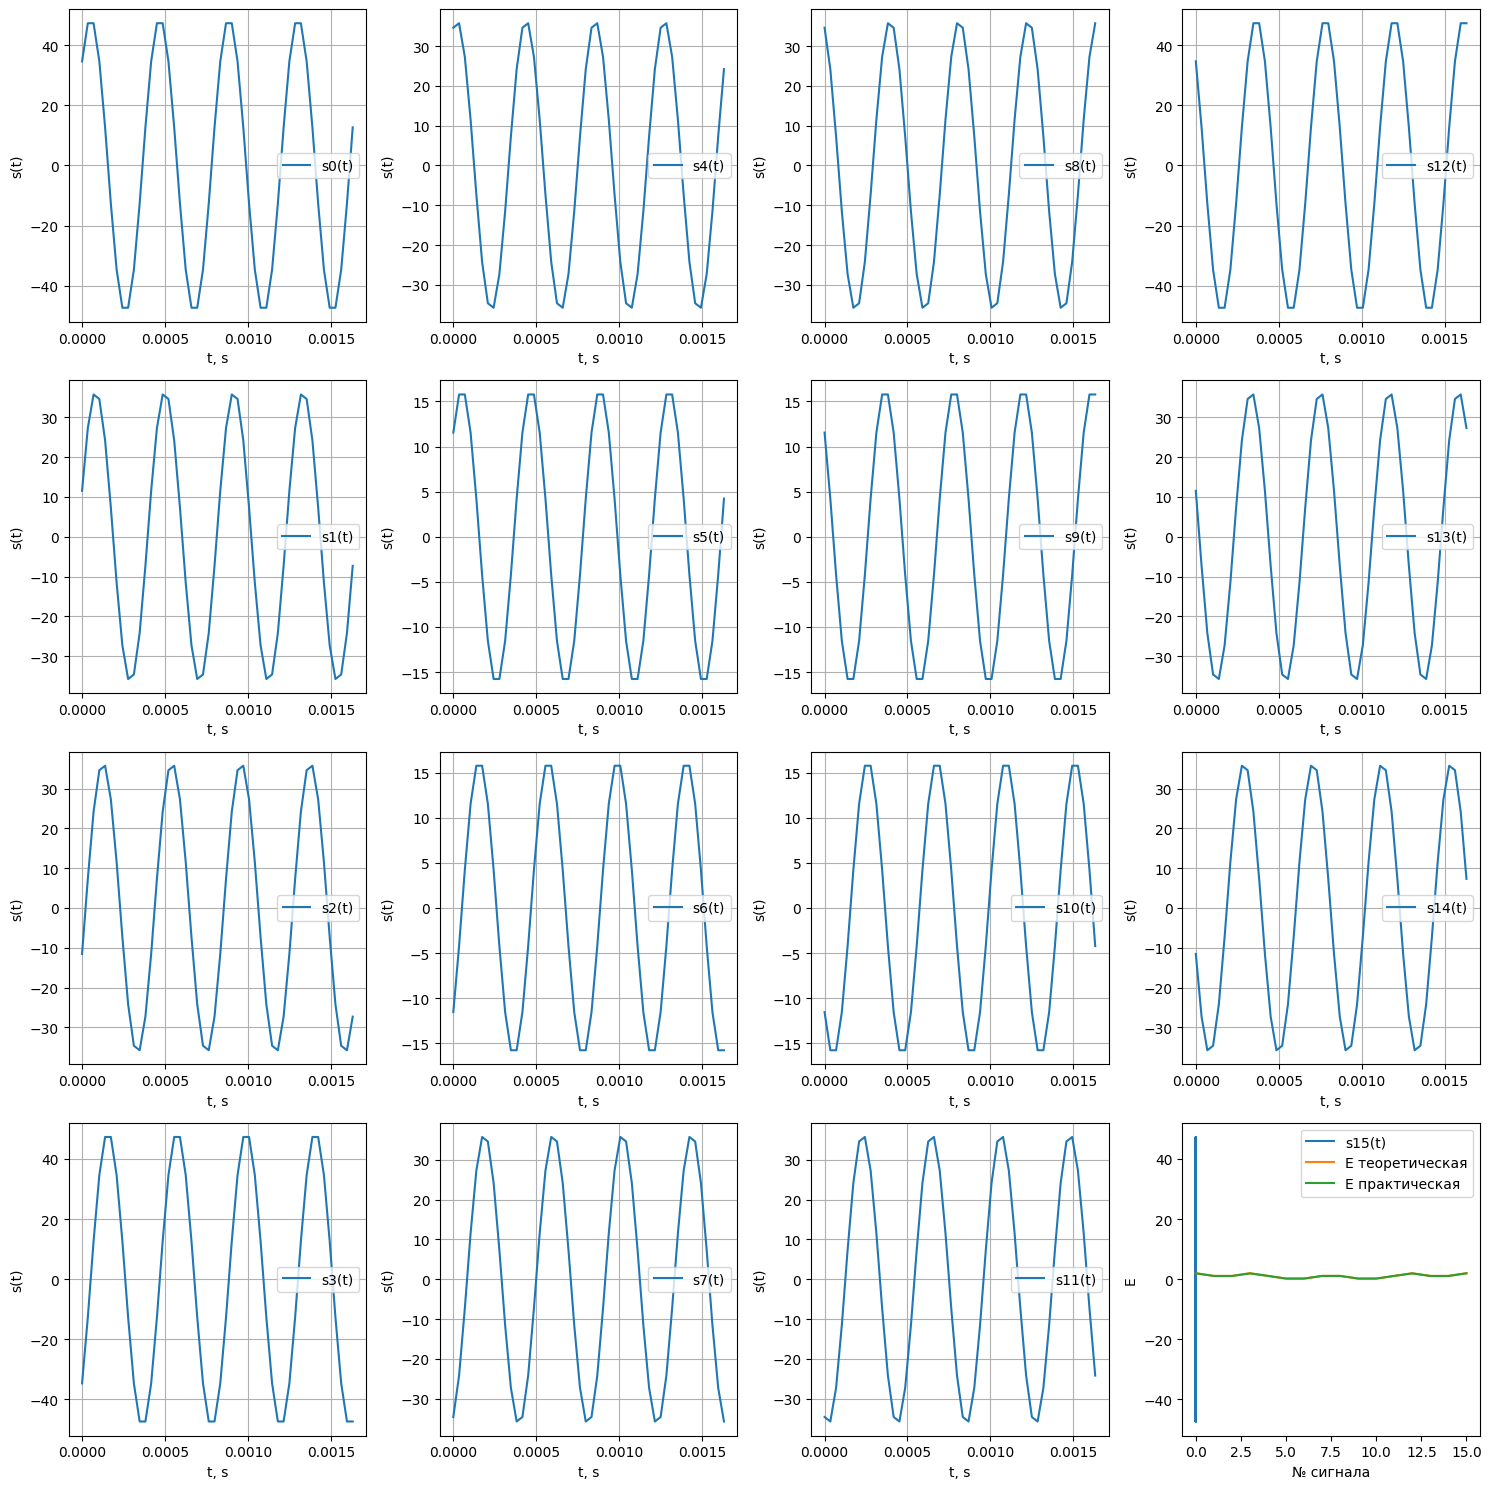

In [22]:
graphlist = list(graph.keys())
r16graph = graphlist[:16]

fig, axs = plt.subplots(4, 4, figsize=(15,15))

for i, graphi in enumerate(r16graph):
    index = i // 4, i % 4
    axs[index].plot(t, graph[graphi], label=graphi)
    axs[index].set_xlabel('t, s')
    axs[index].set_ylabel('s(t)')
    axs[index].legend()
    axs[index].grid()
    
fig.tight_layout()
plt.plot(list(range(len(Eteor))), Eteor, label='E теоретическая')
plt.plot(list(range(len(Epr))), Epr, label='E практическая')
plt.xlabel('№ сигнала')
plt.ylabel('E')
plt.legend()
plt.grid()
plt.show()